<a href="https://colab.research.google.com/github/Gabriel-Leite-Py/DIO_Exercices/blob/main/Transfer_Learning_em_Python_DIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto de Transfer Learning em Python  - DIO
Author: Gabrie Leite

Contact: gabriell.arruda20@hotmail.com

This code was created with the original project:

https://github.com/lmoroney/mlday-tokyo/blob/master/Lab6-Cats-v-Dogs.ipynb

This code is just a Transfer Leaning exercise, so all this code was just adjusted for this proposal, all credits to **mlday-tokyo**.

In [17]:
#manipulation of zip
import zipfile
import os

#Separate the data
import random
from shutil import copyfile

#Machine Learning models
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Download of the DataSet Dogs and Cats and unzip ins current Collab

In [18]:
!wget --no-check-certificate \
    "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip"

path_zip = '/content/kagglecatsanddogs_5340.zip'
zip_ref   = zipfile.ZipFile(path_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

--2024-01-14 22:51:28--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 96.16.68.252, 2600:1409:9800:1583::317f, 2600:1409:9800:158d::317f
Connecting to download.microsoft.com (download.microsoft.com)|96.16.68.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_5340.zip.1’

kagglecatsanddogs_5 100%[===================>] 786.67M  68.9MB/s    in 11s     

2024-01-14 22:51:39 (71.3 MB/s) - ‘kagglecatsanddogs_5340.zip.1’ saved [824887076/824887076]



## Creating the folders to training and testing

In [19]:
try:
    os.mkdir('/content/cats-v-dogs')
    os.mkdir('/content/cats-v-dogs/training')
    os.mkdir('/content/cats-v-dogs/testing')
    os.mkdir('/content/cats-v-dogs/training/cats')
    os.mkdir('/content/cats-v-dogs/training/dogs')
    os.mkdir('/content/cats-v-dogs/testing/cats')
    os.mkdir('/content/cats-v-dogs/testing/dogs')
except OSError:
    pass

## Copy the files in the folders

In [20]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)


CAT_SOURCE_DIR = "/content/PetImages/Cat/"
TRAINING_CATS_DIR = "/content/cats-v-dogs/training/cats/"
TESTING_CATS_DIR = "/content/cats-v-dogs/testing/cats/"
DOG_SOURCE_DIR = "/content/PetImages/Dog/"
TRAINING_DOGS_DIR = "/content/cats-v-dogs/training/dogs/"
TESTING_DOGS_DIR = "/content/cats-v-dogs/testing/dogs/"

split_size = .9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

666.jpg is zero length, so ignoring.
11702.jpg is zero length, so ignoring.


# Defining the Machine Learning struct

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [22]:


TRAINING_DIR = "/content/cats-v-dogs/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=250,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "/content/cats-v-dogs/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=250,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 24765 images belonging to 2 classes.
Found 4766 images belonging to 2 classes.


In [23]:
history = model.fit(train_generator, epochs=15, steps_per_epoch=90,validation_data=validation_generator, validation_steps=6)

Epoch 1/15
90/90 [==============================] - 51s 553ms/step - loss: 0.7263 - acc: 0.5627 - val_loss: 0.6349 - val_acc: 0.6280
Epoch 2/15
90/90 [==============================] - 53s 594ms/step - loss: 0.6086 - acc: 0.6748 - val_loss: 0.5955 - val_acc: 0.7000
Epoch 3/15
90/90 [==============================] - 54s 599ms/step - loss: 0.5492 - acc: 0.7219 - val_loss: 0.5178 - val_acc: 0.7527
Epoch 4/15
90/90 [==============================] - 51s 569ms/step - loss: 0.5100 - acc: 0.7481 - val_loss: 0.5128 - val_acc: 0.7540
Epoch 5/15
90/90 [==============================] - 53s 594ms/step - loss: 0.4803 - acc: 0.7660 - val_loss: 0.4597 - val_acc: 0.7720
Epoch 6/15
90/90 [==============================] - 55s 617ms/step - loss: 0.4523 - acc: 0.7871 - val_loss: 0.4373 - val_acc: 0.8093
Epoch 7/15
90/90 [==============================] - 55s 616ms/step - loss: 0.4258 - acc: 0.8033 - val_loss: 0.3864 - val_acc: 0.8307
Epoch 8/15
90/90 [==============================] - 50s 558ms/step - 

## Plotting the current status of Machine Learning prediction trained


<Figure size 640x480 with 0 Axes>

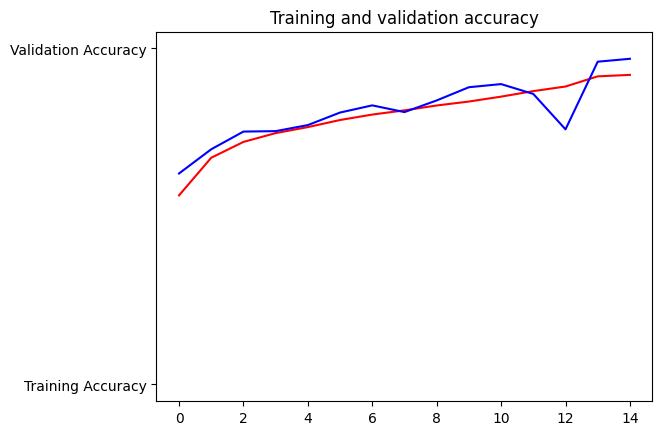

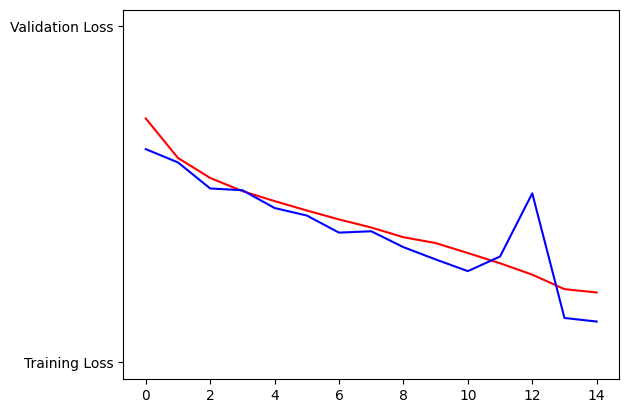

<Figure size 640x480 with 0 Axes>

In [24]:
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()


## Inputing new data for test the RNA treined

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

Saving IMG_20220402_124124.jpg to IMG_20220402_124124.jpg
1/1 [==============================] - 0s 18ms/step
[1.]
IMG_20220402_124124.jpg is a dog
